### <center>Project 6 : Deep Learning : Neural Networks</center>  
### <center><u>Bank Churn Prediction</u></center>  

#### <bold><u>Objective</u>: Given a Bank customer, build a Neural Network based Classifier to determine if they will leave or not in the next 6 months.</bold>  


### <center> Data Dictionary</center>  

| No | Name             | Meaning                       | Original Data Name | Short Data Name | Analytic Type | Data Type  | Unit Of Measure | Variable Type | Description / Comments     |
|---:|:-----------------|:------------------------------|:-------------------|:----------------|:--------------|:-----------|:----------------|:--------------|:---------------------------|
|  1 | Row Number       | Unique Row#                   | RowNumber          | N/A             | N/A           | Integer    | Serial Number   | int64         | DROP Column: Unique values |
|  2 | Customer Id      | Unique Customer#              | CustomerId         | N/A             | N/A           | Integer    | Serial Number   | int64         | DROP Column: Unique values |
|  3 | Surname          | Cust.Last Name                | Surname            | N/A             | N/A           | Alphabetic | N/A             | object        | DROP Column: Not Useful    |
|  4 | Credit Score     | Customer's Credit Score       | CreditScore        | crscr           | Quantitative  | Integer    | N/A             | int64         | Predictor Column           |
|  5 | Geography        | Customer's Country            | Geography          | geo             | Qualitative   | Alphabetic | N/A             | object        | Predictor Column           |
|  6 | Gender           | Cust.Gender Male/Female       | Gender             | sex             | Qualitative   | Alphabetic | N/A             | object        | Predictor Column           |
|  7 | Age              | Customer's Age                | Age                | age             | Quantitative  | Integer    | Year            | int64         | Predictor Column           |
|  8 | Tenure           | Cust's Years with Bank        | Tenure             | tenure          | Quantitative  | Integer    | Year            | int64         | Predictor Column           |
|  9 | Balance          | Cust's Bank A/c Balance       | Balance            | bal             | Quantitative  | Float      | Currency        | float64       | Predictor Column           |
| 10 | Num Of Products  | Products Used by Cust         | NumOfProducts      | prods           | Quantitative  | Integer    | Count           | int64         | Predictor Column           |
| 11 | Has Credit Card  | Has Credit Card? Yes/No (1,0) | HasCrCard          | cards           | Qualitative   | Integer    | N/A             | int64         | Predictor Column           |
| 12 | Is Active Member | Cust. Active? Yes/No (1,0)    | IsActiveMember     | active          | Qualitative   | Integer    | N/A             | int64         | Predictor Column           |
| 13 | Estimated Salary | Cust's Approx. Salary         | EstimatedSalary    | salary          | Quantitative  | Float      | Currency        | float64       | Predictor Column           |
| 14 | Exited           | Cust. Exited? Yes/No (1,0)    | Exited             | exited          | Qualitative   | Integer    | N/A             | int64         | PREDICTED / TARGET Column  |


* Data is provided in a Comma Separated flat text file: "bank.csv"  
* Data file has 14 Features / Columns  
* Data file has 10,000 rows / records  


### <center>Rubric: Scoring Guide: Points By Criteria: Total 60 Points:</center>  

| Pts| Criteria    |                               | Pts| Criteria    |                | Pts| Criteria    |  
|---:|:------------|                               |---:|:----|                        |---:|:------------|  
| 05 | Feature Elimination|                        | 05 | Data Split into Train & Test Sets |    | 20 | Build Model, identify Points to Improve & Implement (Optimization) |  
| 05 | Identify Features and Target Variable |                                    | 10 | Normalization of Data |           | 10 | Predict  Output for Input data using Threshold = 0.5 |  
|    |   |                                    |  |  |           | 05 | Evaluate model Performance using Confusion Matrix & Accuracy Score |  



### Deliverables: Steps to Follow:  
D1. Feature Elimination : 5 Marks  
  * Read Dataset  
  * (Perform EDA, Univariate)  
  * Drop the columns which are unique for all users like IDs  
  
D2. Bivariate : 5 Marks  
  * Distinguish the Features and Target variable  

D3. Data Split : 5 Marks  
  * Divide the data set into Training and Test sets  

D4. Normalization : 10 Marks  
  * Normalize the Train and Test data  

D5. Modelling : 20 Marks  
  * Initialize & Build the Model (Neural Network)  
  * Identify Points to Improve & Implement (Optimization)  

D6. Prediction at 0.5 Threshold :  10 Marks  
  * Predict the Output (Results) using 0.5 as a threshold  

D7. Model Performance Evaluation : 5 Marks  
  * Print Accuracy Score  
  * Print Confusion Matrix  
  

### Code Begin : ⬇  
**Load Libraries : ⬇**

In [1]:
# v====== Standard Libraries Begin ======v #

# from google.colab import drive
# drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt  # Data visualization for Ploting  
import matplotlib.image as mpimg  # To handle plot images, diskfile save, retrieve, render/display 

from matplotlib import cm  # Color Maps  
from mpl_toolkits.mplot3d import Axes3D  # MSB: For 3D plots: 5 USL KMeans Case Study Mr.Tom 
%matplotlib inline  

import pandas as pd  # to handle data in form of rows and columns
import pandas_profiling 
from pandas import ExcelWriter  # Outputs a Excel disk file

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras import initializers 
from tensorflow.keras import optimizers 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 

from category_encoders import OrdinalEncoder

from scipy.stats import zscore, pearsonr, randint as sp_randint  # For LinReg 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer  

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, binarize, LabelEncoder, OneHotEncoder # M.Rao

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # LinRegr
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, \
                            f1_score, roc_curve, roc_auc_score, classification_report, auc  # LogRegr

# For Linear Dimensionality (Cols/Attributes) Reduction to a Lower dimensional space (eg: reduce 15 cols to 2 cols): 
from sklearn.decomposition import PCA  # 5 UL : "Principal Component Analysis" for "Singular Value Decomposition" (SVD) 

from sklearn.pipeline import Pipeline, make_pipeline  # M.Rao

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import ClassificationReport, ROCAUC


# Utilities: 

# "Aalmond" library is self created by myself (Manoj S Bhave) and is made available publically on PyPi.org which provides 3 Functions: 
# 1. vitalStats(df) : Extends df.describe() output to include outliers, -ve, zero, nulls, uniques values, modes, skewness, etc. 
# 2. showOutL(df) : Detects, Displays and Imputes outlier values based on IQR method. 
# 3. showdfQ(df) : Displays dataframe rows from a variety of sections of the df like mid df, mid q1/q3 of df, head, tail, random etc. 

import Aalmond.Aalmond as aa 

# Multiple output displays per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Image, Markdown
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>")) # Increase cell width

# ===== Settings ===== 
pd.options.display.float_format = '{:,.2f}'.format  # Remove scientific notations to display numbers with 2 decimals
pd.set_option('display.max_columns', 100)  # Max df cols to display set to 100.
pd.set_option('display.max_rows', 50)  # Max df rows to display set to 50.
# pd.set_option('display.max_rows', tdf.shape[0]+1)  # just one row more than the total rows in df

print('TensorFlow Version:', tf.__version__)
print('Keras Version:', keras.__version__)


# ====== Standard Libraries End ======^ #



TensorFlow Version: 2.0.0
Keras Version: 2.2.4-tf


**Functions: Define Custom Utilities⬇**  

In [840]:
def LossAccPlot(history): 

    """  
    Custom Local Function: For Deep Learning Neural Network Project:  

    Plots 2 Curves Side by Side for Train & Validation Datasets (Color Coded):  
    
    1. Loss over Epochs.  
    2. Accuracy over Epochs.  
       
    """  
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(np.array(history.history['loss']) * 100)
    plt.plot(np.array(history.history['val_loss']) * 100)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.title('Loss Over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(np.array(history.history['accuracy']) * 100)
    plt.plot(np.array(history.history['val_accuracy']) * 100)
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.title('Accuracy Over Epochs')

    plt.tight_layout()
    plt.show();

### D1. Feature Elimination : Starts Here: ⬇  

* Read Dataset
* Drop the columns which are unique for all users like IDs
* (Perform EDA, Univariate)

In [2]:
# Read & Load the input Datafile into Dataset frame: Bank Customer DataFrame: 
cdf = pd.read_csv('bank.csv')
cdf

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1  83,807.86              1          0               1   
2          8 159,660.80              3          1               0   
3          1       0.00              2          0               0   
4          2 125,510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10  57,369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3  75,075.31              2          1               0   
9999       4 130,142.79              1          1               0   

      EstimatedSalary  Exited  
0          101,348.88       1  
1          112,542.58       0  
2          113,931.57       1  
3           93,826.63       0  
4           79,084.10       0  
...               ...     ...  
9995        96,270.64       0  
9996       101,699.77       0  
9997        42,085.58       1  
9998        92,888.52       1  
9999        38,190.78       0  

[10000 rows x 14 columns]

In [3]:
# Housekeeping: Incremental DF Data Backup as of now: 
Markdown("### Incremental DF Data Backup 0")

cdf0 = cdf.copy()  # Original Df
cdf.to_csv('cdf0.csv')  # Also export as .csv file to disk

# Verify backup copy
! ls -l cdf*
cdf0.shape, type(cdf0)
cdf0.sample(6)

### Incremental DF Data Backup 0

-rw-r--r--@ 1 RiddhiSiddhi  staff  731366 Sep  3 00:37 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  518046 Sep  2 06:54 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  428928 Sep  2 06:54 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  528968 Sep  2 08:31 cdf3.csv


((10000, 14), pandas.core.frame.DataFrame)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
6814       6815    15665943        Mai          445    France    Male   25   
9147       9148    15781326       Ford          636    France    Male   35   
527         528    15573318       Kung          610    France    Male   26   
6725       6726    15639552     Mellor          603   Germany  Female   40   
3551       3552    15580629  Blackwood          604    France    Male   31   
4549       4550    15587611  Kauffmann          537    France    Male   59   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6814       6       0.00              2          1               0   
9147       9  95,478.17              1          0               0   
527        8       0.00              2          1               0   
6725       8 148,897.02              1          0               0   
3551       6 134,837.58              1          1               0   
4549       9       0.00              2          0               0   

      EstimatedSalary  Exited  
6814       119,425.94       0  
9147       169,286.74       0  
527        166,031.08       0  
6725       105,052.90       0  
3551       192,029.19       0  
4549       103,799.77       1

In [4]:
# DROP column 'RowNumber' (Serial Number), 'CustomerId' (Customer ID), 'Surname' (Customer Last Name): 
# These cols do not provide any Predictive or Analytical value to the Model Training / Learning process: 

cdf.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True) 
cdf.head() 

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1  83,807.86              1   
2          502    France  Female   42       8 159,660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2 125,510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1       101,348.88       1  
1          0               1       112,542.58       0  
2          1               0       113,931.57       1  
3          0               0        93,826.63       0  
4          1               1        79,084.10       0

In [5]:
# Rename column names for convenience and/or meaningfulness:  
cdf.head(3)
cdf.rename(columns={ 'CreditScore' : 'crscr' , 'Geography' : 'geo' , 'Gender' : 'sex' , 'Age' : 'age' , 'Tenure' : 'tenure' , 
                     'Balance' : 'bal', 'NumOfProducts' : 'prods', 'HasCrCard' : 'cards', 'IsActiveMember' : 'active', 
                     'EstimatedSalary' : 'salary', 'Exited' : 'exited' }, 
           inplace=True, errors='raise')
cdf.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1  83,807.86              1   
2          502    France  Female   42       8 159,660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1       101,348.88       1  
1          0               1       112,542.58       0  
2          1               0       113,931.57       1

crscr     geo     sex  age  tenure        bal  prods  cards  active  \
0    619  France  Female   42       2       0.00      1      1       1   
1    608   Spain  Female   41       1  83,807.86      1      0       1   
2    502  France  Female   42       8 159,660.80      3      1       0   

      salary  exited  
0 101,348.88       1  
1 112,542.58       0  
2 113,931.57       1

In [6]:
# Housekeeping: Incremental DF Data Backup as of now: 
Markdown("### Incremental DF Data Backup 1")

cdf1 = cdf.copy()  # DF Modified: Changed col names
cdf.to_csv('cdf1.csv')  # Also export as .csv file to disk

# Verify backup copy
! ls -l cdf*
cdf1.shape, type(cdf1)
cdf1.sample(6)

### Incremental DF Data Backup 1

-rw-r--r--@ 1 RiddhiSiddhi  staff  731366 Sep  3 00:37 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  518046 Sep  3 00:37 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  428928 Sep  2 06:54 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  528968 Sep  2 08:31 cdf3.csv


((10000, 11), pandas.core.frame.DataFrame)

crscr      geo     sex  age  tenure        bal  prods  cards  active  \
1633    562   France    Male   35       7       0.00      1      0       0   
2928    668  Germany  Female   39       0 122,104.79      1      1       0   
5357    405  Germany    Male   31       5 133,299.67      2      1       1   
2180    649   France  Female   42       7       0.00      2      0       1   
5615    520   France  Female   29       8  95,947.76      1      1       0   
6672    827    Spain  Female   35       0       0.00      2      0       1   

         salary  exited  
1633  48,869.67       0  
2928 112,946.67       1  
5357  72,950.14       0  
2180  22,974.01       0  
5615   4,696.44       0  
6672 184,514.01       0

In [7]:
### Housekeeping: Incremental Jupyter Code File Backup 1 as of now ^^^
Markdown("### Incremental Jupyter Notebook Code File Backup 1")

! cp "Project 6 NN Bank Churn Prediction.ipynb" \
     "Project 6 NN Bank Churn Prediction 1.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code File Backup 1

-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:37 Project 6 NN Bank Churn Prediction 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3938900 Sep  2 08:33 Project 6 NN Bank Churn Prediction 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:37 Project 6 NN Bank Churn Prediction.ipynb


In [44]:
# profile = pandas_profiling.ProfileReport(cdf) 
# profile 
pandas_profiling.ProfileReport(cdf) 

### D2. Identity the Features and Target variable:  Starts Here: ⬇  
* **<u>Target Variable</u>: "<u>exited</u>" = Categorical = Binary values: 1 = Exited; 0 = Not Exited**  
* Feature Variables: Rest all 10 columns: Refer to "<u>Data Dictionary</u>" section at the Top above  
  * Categorical Columns: 'geo', 'sex', 'prods', 'cards', 'active' ('geo', 'sex' to Label Encoded and rest all to be One Hot Encoded)  
  * Non Category Columns: 'crscr', 'age', 'tenure', 'bal', 'salary'  
  * NOTE: 'age' can be binned and treated as Categorical column  


In [8]:
# Label Encode the two Categorical Columns: 'geo' & 'sex':  
cdf.sex.value_counts()
cdf['sex'] = cdf['sex'].replace(['Female', 'Male'], [0, 1])
cdf.sex.value_counts()

Male      5457
Female    4543
Name: sex, dtype: int64

1    5457
0    4543
Name: sex, dtype: int64

In [9]:
# Label Encode the two Categorical Columns: 'geo' & 'sex':  
cdf.geo.value_counts()
cdf['geo'] = cdf['geo'].replace(['France', 'Germany', 'Spain'], [1, 2, 3])
cdf.geo.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geo, dtype: int64

1    5014
2    2509
3    2477
Name: geo, dtype: int64

In [10]:
# Housekeeping: Incremental DF Data Backup as of now: 
Markdown("### Incremental DF Data Backup 2")

cdf2 = cdf.copy()  # DF Modified: Label encoded cols 'geo', 'sex'. Datatype got changed from 'object' to 'int64' 
cdf.to_csv('cdf2.csv')  # Also export as .csv file to disk

# Verify backup copy
! ls -l cdf*
cdf2.shape, type(cdf2)
cdf2.sample(5)

### Incremental DF Data Backup 2

-rw-r--r--@ 1 RiddhiSiddhi  staff  731366 Sep  3 00:37 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  518046 Sep  3 00:37 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  428928 Sep  3 00:38 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  528968 Sep  2 08:31 cdf3.csv


((10000, 11), pandas.core.frame.DataFrame)

crscr  geo  sex  age  tenure        bal  prods  cards  active  \
7944    520    1    0   39       1  73,493.17      1      0       1   
6760    661    1    1   41       5       0.00      1      0       1   
7596    599    2    1   40      10 137,456.28      2      1       1   
1783    533    3    1   38       1 135,289.33      2      0       1   
393     556    3    1   38       8       0.00      2      0       0   

         salary  exited  
7944 109,626.13       1  
6760  88,279.60       0  
7596  14,113.11       0  
1783 152,956.33       0  
393      417.41       1

In [11]:
# Basic Vital Stats for the data: Using custom function(s) from self created public lib "Aalmond" version 0.1: 
# This library / module "Aalmond" is self created (Manoj S Bhave) and is published on pypi.org for public use under MIT License: 
# For more info and help shift+tab on the function name: 

aa.vitalStats(cdf, dcols=True, srows='m0')

* DF Stats For All Columns:


cols    dtype       mean       std    min       25%        50%  \
0    crscr    int64     650.53     96.65 350.00    584.00     652.00   
1      geo    int64       1.75      0.83   1.00      1.00       1.00   
2      sex    int64       0.55      0.50   0.00      0.00       1.00   
3      age    int64      38.92     10.49  18.00     32.00      37.00   
4   tenure    int64       5.01      2.89   0.00      3.00       5.00   
5      bal  float64  76,485.89 62,397.41   0.00      0.00  97,198.54   
6    prods    int64       1.53      0.58   1.00      1.00       1.00   
7    cards    int64       0.71      0.46   0.00      0.00       1.00   
8   active    int64       0.52      0.50   0.00      0.00       1.00   
9   salary  float64 100,090.24 57,510.49  11.58 51,002.11 100,193.91   
10  exited    int64       0.20      0.40   0.00      0.00       0.00   

          75%        max   unq  null  zero  <0  skew  OutL  OutH      mode  
0      718.00     850.00   460     0     0   0 -0.07    15     0    850.00  
1        2.00       3.00     3     0     0   0  0.50     0     0      1.00  
2        1.00       1.00     2     0  4543   0 -0.18     0     0      1.00  
3       44.00      92.00    70     0     0   0  1.01     0   359     37.00  
4        7.00      10.00    11     0   413   0  0.01     0     0      2.00  
5  127,644.24 250,898.09  6382     0  3617   0 -0.14     0     0      0.00  
6        2.00       4.00     4     0     0   0  0.75     0    60      1.00  
7        1.00       1.00     2     0  2945   0 -0.90     0     0      1.00  
8        1.00       1.00     2     0  4849   0 -0.06     0     0      1.00  
9  149,388.25 199,992.48  9999     0     0   0  0.00     0     0 24,924.92  
10       0.00       1.00     2     0  7963   0  1.47     0  2037      0.00

* Rows: 10000  * Cols: 11  * Elements: 110000  * DUP.Rows: 0  * DUP.Cols: 0  * Outliers: OutL < Q1-IORx1.5, OutH > Q3+IORx1.5



'\n Showing Middle 10 Rows: \n'

crscr  geo  sex  age  tenure        bal  prods  cards  active  \
4995    807    1    0   36       4       0.00      2      0       1   
4996    500    2    1   44       9 160,838.13      2      1       0   
4997    722    3    1   43       1       0.00      1      1       0   
4998    559    3    0   40       7 144,470.77      1      1       1   
4999    584    3    0   38       3       0.00      2      1       1   
5000    834    2    0   68       9 130,169.27      2      0       1   
5001    754    3    1   35       4       0.00      2      1       1   
5002    590    1    1   43       7  81,076.80      2      1       1   
5003    740    1    1   36       7       0.00      1      1       1   
5004    502    2    0   57       3 101,465.31      1      1       0   
5005    733    1    1   48       5       0.00      1      0       1   

         salary  exited  
4995 147,007.33       0  
4996 196,261.64       0  
4997  44,560.17       1  
4998  18,917.95       0  
4999   4,525.40       0  
5000  93,112.20       0  
5001   9,658.41       0  
5002 182,627.25       1  
5003  13,177.40       0  
5004  43,568.31       1  
5005 117,830.57       0

Observations from the Profile Report df stats above:  

* Total Rows 10,000  
* Zeros values in columns: 'exited'=79%, 'active'=48%, 'bal'=36%, 'cards'=29%, 'tenure'=4%: All valid Zeroes values. ACTION: None  
* Outliers values in columns: High: 'exited'=20%, 'age'=3.6%, 'prods'=0.6%, 'crscr'=0.15% : One outliers is very High, one is Low, other two are negligible. ACTION: Do Not Impute. Scaling/Normalization to be done instead.  
* Skewness: High: 'exited', 'age', 'cards', 'prods'; Very Low: Rest all 7 columns. See Skewness Guide below: ACTION: Scale/Normalize  
* No Null values. No Negative (-ve) values. No multiple Modes. No Duplicate Rows or Columns. No non numeric data in Numeric columns.  
* Rest all values appear to be OK  

##### <center>Skewness Guide (Arbitrary): If distribution skew() is between these ranges then the degree of Skewness is :</center>  
| Degree   |    Lower    |    Upper    | Type       | Comments                 |
|----------|:-----------:|:-----------:|------------|--------------------------|
| High     |     < −1    |     > +1    | Asymmetric | Outside of Lower & Upper |
| Moderate | −1.0 & −0.5 | +0.5 & +1.0 | Asymmetric | Within Lower OR Upper    |
| Low      |     −0.5    |     +0.5    | Asymmetric | Within Lower AND Upper   |
| Very Low |    −0.25    |    +0.25    | Symmetric  | Within Lower AND Upper   |
| No Skew  |    0.0 or   |  near +0.0- | Symmetric  | Almost zero (+ or -)     |

ACTION: Items From The Above Observations: Outliers in the four columns need not be imputed. Binning, Scaling, Categorization needs to be done instead, which will also reduce skweness. Target col 'exited' (binary cat.col.) should not be imputed because all values will become zero. 



* Outliers Detection: IQR Method: For All Numerical Columns: LOW Whisker = Q1 - (IQR * 1.5); HIGH Whisker = Q3 + (IQR *1.5): 


* Column: crscr : Total 15 Outlier Values:
   15 outliers Under Low  Whisker =   383.0 : Impute with Q1 value: 584.0

* Column: geo : Total 0 Outlier Values: NO OUTLIERS!

* Column: sex : Total 0 Outlier Values: NO OUTLIERS!

* Column: age : Total 359 Outlier Values:
  359 outliers Over  High Whisker =    62.0 : Impute with Q3 value: 44.0

* Column: tenure : Total 0 Outlier Values: NO OUTLIERS!

* Column: bal : Total 0 Outlier Values: NO OUTLIERS!

* Column: prods : Total 60 Outlier Values:
   60 outliers Over  High Whisker =     3.5 : Impute with Q3 value: 2.0

* Column: cards : Total 0 Outlier Values: NO OUTLIERS!

* Column: active : Total 0 Outlier Values: NO OUTLIERS!

* Column: salary : Total 0 Outlier Values: NO OUTLIERS!

* Column: exited : Total 2037 Outlier Values:
  2037 outliers Over  High Whisker =     0.0 : Impute with Q3 value: 0.0


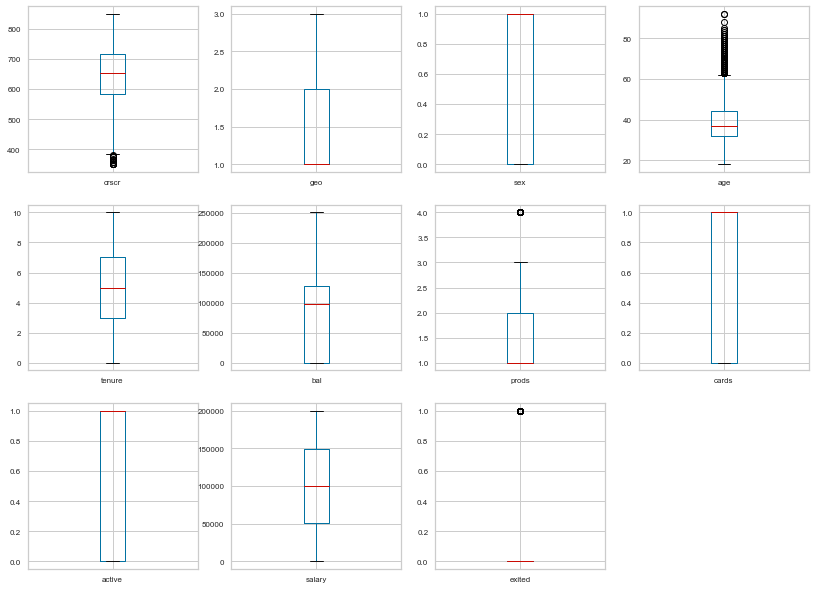

In [12]:
# Custom Function showOutL() Detects, Display and/or Imputes Outliers by IQR method. 
# Custom library / module "Aalmond" Written by self (Manoj S Bhave) and is published on PyPi, Python Libs, etc...
# For more details use Shift+Tab on this function below: 

# Use the Custom Function showOutL() in "Display Only" mode (NO Impute): 
aa.showOutL(cdf)  # list Outliers 

# Box & Whisker plots to check for Outliers: 
cdf.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show();

crscr   geo   sex   age  tenure   bal  prods  cards  active  salary  \
crscr    1.00  0.01 -0.00 -0.00    0.00  0.01   0.01  -0.01    0.03   -0.00   
geo      0.01  1.00  0.00  0.02    0.00  0.07   0.00  -0.01    0.01   -0.00   
sex     -0.00  0.00  1.00 -0.03    0.01  0.01  -0.02   0.01    0.02   -0.01   
age     -0.00  0.02 -0.03  1.00   -0.01  0.03  -0.03  -0.01    0.09   -0.01   
tenure   0.00  0.00  0.01 -0.01    1.00 -0.01   0.01   0.02   -0.03    0.01   
bal      0.01  0.07  0.01  0.03   -0.01  1.00  -0.30  -0.01   -0.01    0.01   
prods    0.01  0.00 -0.02 -0.03    0.01 -0.30   1.00   0.00    0.01    0.01   
cards   -0.01 -0.01  0.01 -0.01    0.02 -0.01   0.00   1.00   -0.01   -0.01   
active   0.03  0.01  0.02  0.09   -0.03 -0.01   0.01  -0.01    1.00   -0.01   
salary  -0.00 -0.00 -0.01 -0.01    0.01  0.01   0.01  -0.01   -0.01    1.00   
exited  -0.03  0.04 -0.11  0.29   -0.01  0.12  -0.05  -0.01   -0.16    0.01   

        exited  
crscr    -0.03  
geo       0.04  
sex      -0.11  
age       0.29  
tenure   -0.01  
bal       0.12  
prods    -0.05  
cards    -0.01  
active   -0.16  
salary    0.01  
exited    1.00

<AxesSubplot:>

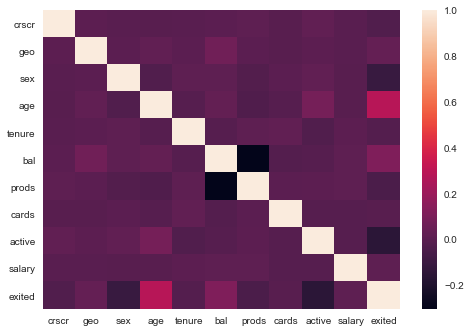

In [13]:
cdf.corr()
sns.heatmap(cdf.corr())

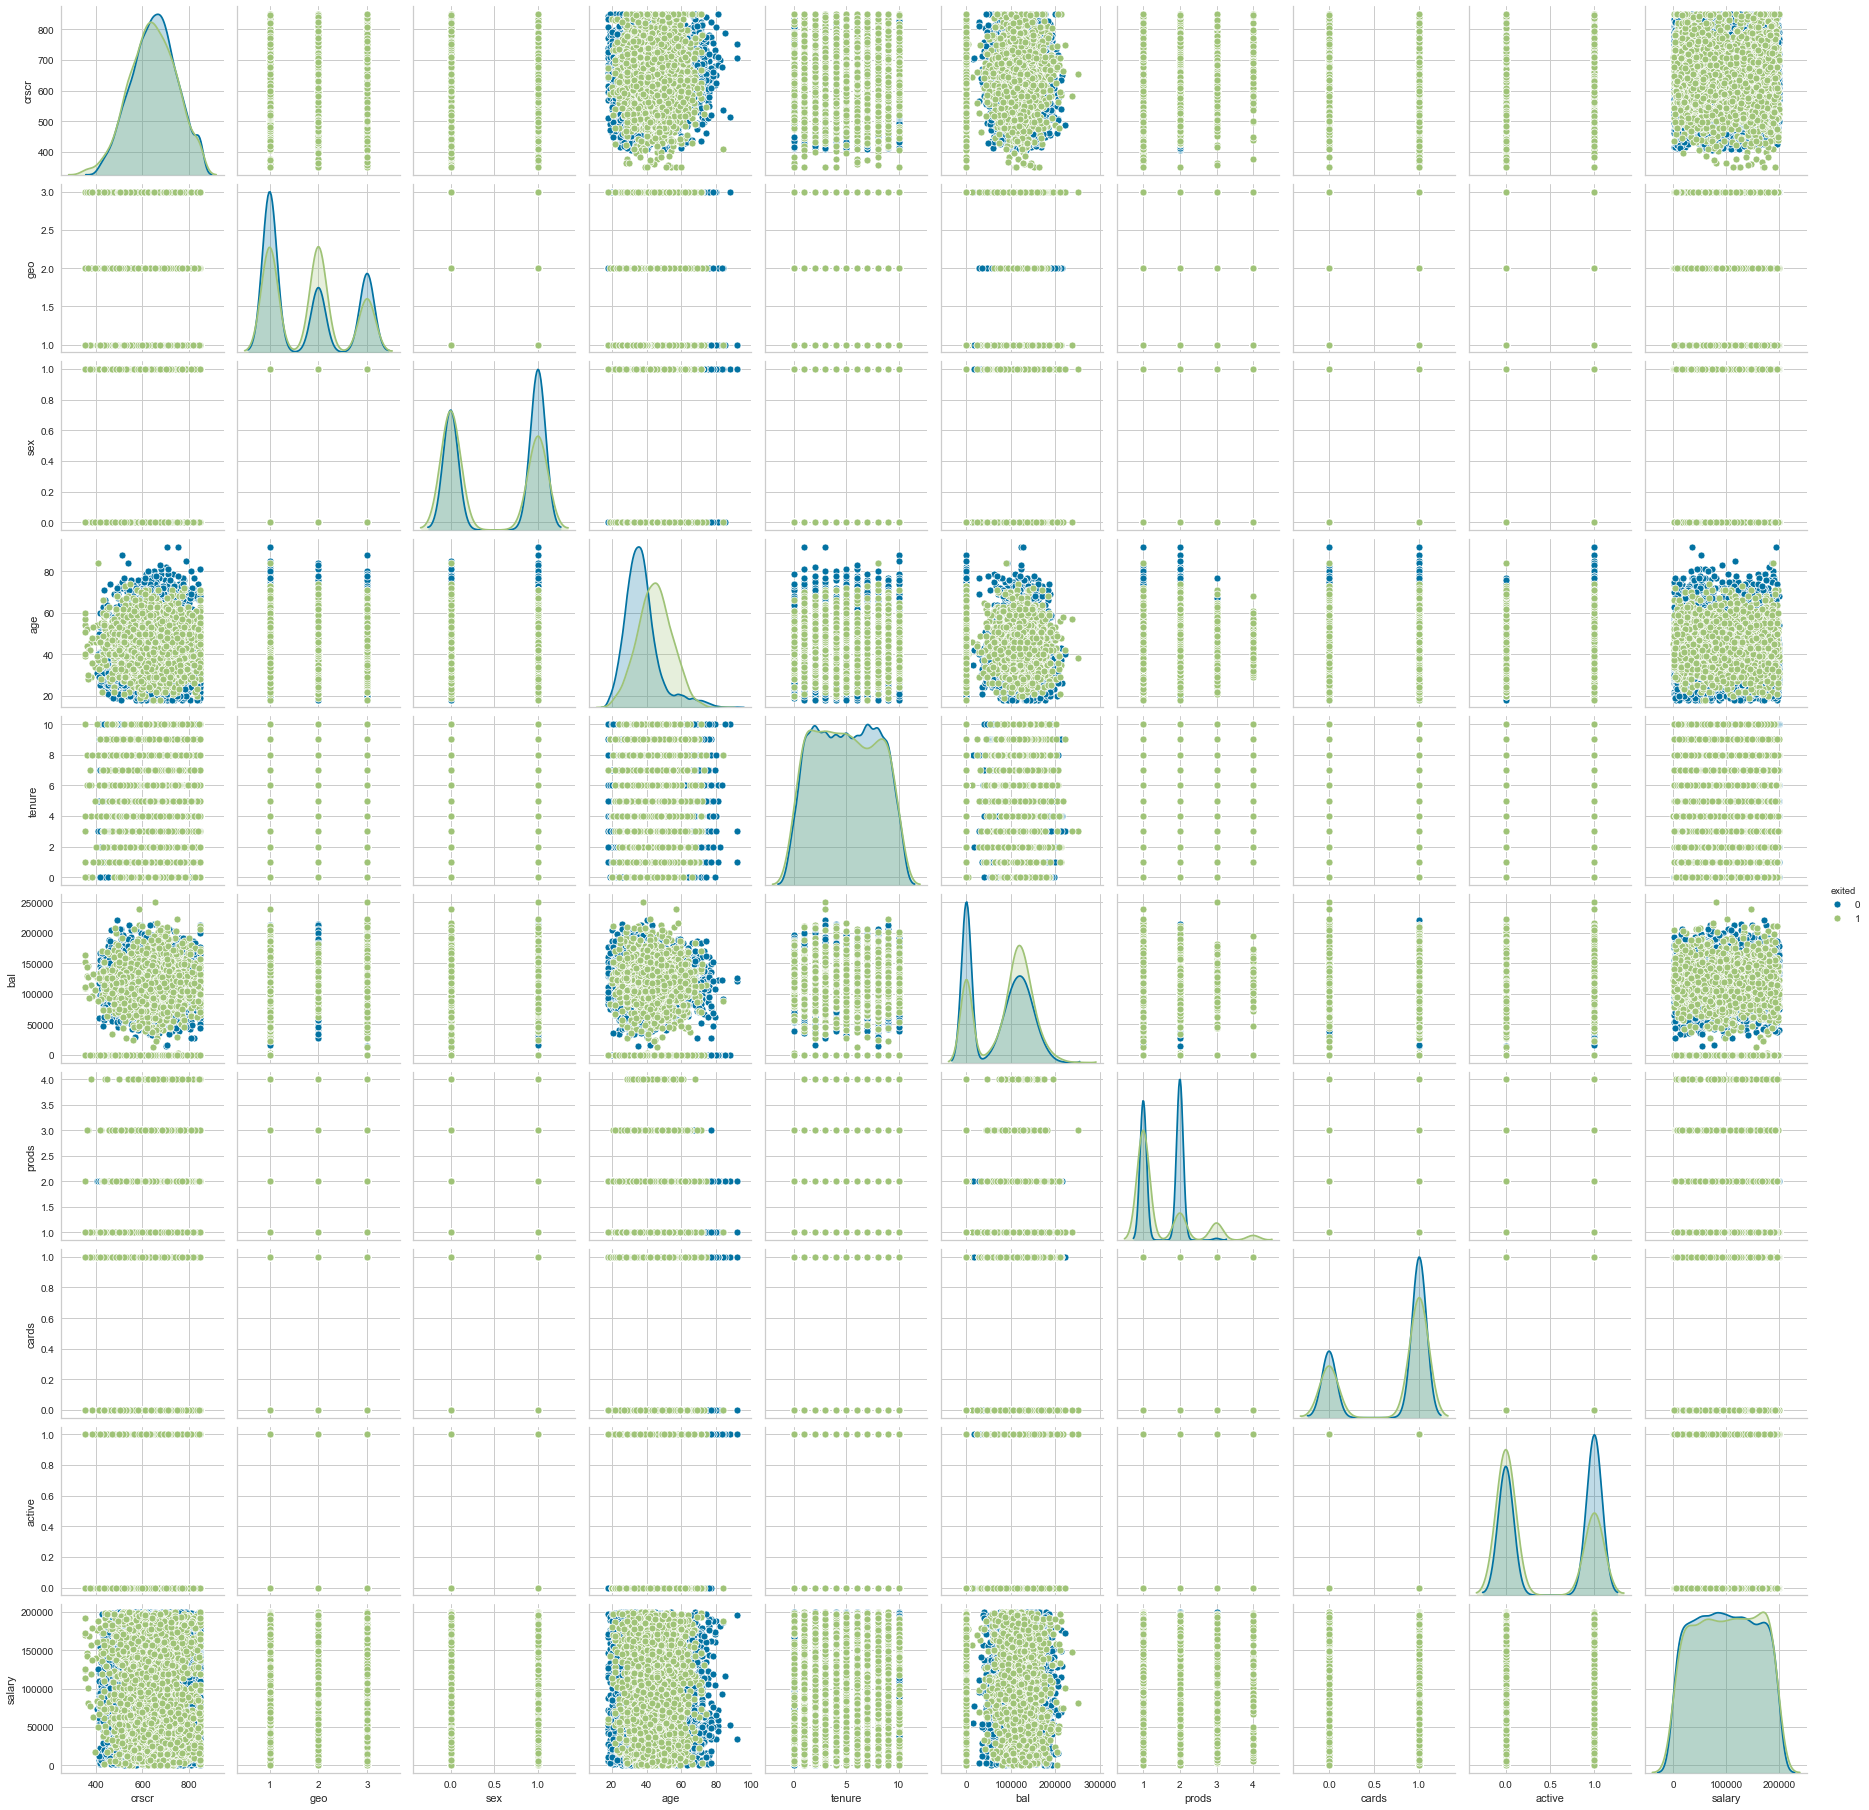

In [81]:
sns.pairplot(cdf, hue='exited')

* From the above Heatmap and Pairplot there are no correlated features/columns nor any apparent predictor columns.

In [14]:
# Do One Hot Encoding for Category Columns: 'geo', 'prods'
# All other cols are either binary (0,1) cat.cols. OR continious variable (to be Scaled/Normalized)

cdf = pd.get_dummies(cdf, columns=['geo', 'prods']) 
cdf 

crscr  sex  age  tenure        bal  cards  active     salary  exited  \
0       619    0   42       2       0.00      1       1 101,348.88       1   
1       608    0   41       1  83,807.86      0       1 112,542.58       0   
2       502    0   42       8 159,660.80      1       0 113,931.57       1   
3       699    0   39       1       0.00      0       0  93,826.63       0   
4       850    0   43       2 125,510.82      1       1  79,084.10       0   
...     ...  ...  ...     ...        ...    ...     ...        ...     ...   
9995    771    1   39       5       0.00      1       0  96,270.64       0   
9996    516    1   35      10  57,369.61      1       1 101,699.77       0   
9997    709    0   36       7       0.00      0       1  42,085.58       1   
9998    772    1   42       3  75,075.31      1       0  92,888.52       1   
9999    792    0   28       4 130,142.79      1       0  38,190.78       0   

      geo_1  geo_2  geo_3  prods_1  prods_2  prods_3  prods_4  
0         1      0      0        1        0        0        0  
1         0      0      1        1        0        0        0  
2         1      0      0        0        0        1        0  
3         1      0      0        0        1        0        0  
4         0      0      1        1        0        0        0  
...     ...    ...    ...      ...      ...      ...      ...  
9995      1      0      0        0        1        0        0  
9996      1      0      0        1        0        0        0  
9997      1      0      0        1        0        0        0  
9998      0      1      0        0        1        0        0  
9999      1      0      0        1        0        0        0  

[10000 rows x 16 columns]

In [15]:
# Housekeeping: Incremental DF Data Backup as of now: 
Markdown("### Incremental DF Data Backup 3")

cdf3 = cdf.copy()  # DF Modified: One Hot encoded cols 'geo', 'prods' 
cdf.to_csv('cdf3.csv')  # Also export as .csv file to disk

# Verify backup copy
! ls -l cdf*
cdf3.shape, type(cdf3)
cdf3.sample(5)

### Incremental DF Data Backup 3

-rw-r--r--@ 1 RiddhiSiddhi  staff  731366 Sep  3 00:37 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  518046 Sep  3 00:37 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  428928 Sep  3 00:38 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  528968 Sep  3 00:39 cdf3.csv


((10000, 16), pandas.core.frame.DataFrame)

crscr  sex  age  tenure        bal  cards  active     salary  exited  \
1351    648    0   54       9 120,633.42      0       0   5,924.38       1   
8244    528    0   32       0  68,138.37      1       1 170,309.19       0   
3647    729    1   67       2  94,203.80      0       1 102,391.06       0   
1143    630    1   43       9       0.00      1       1  34,338.04       0   
3522    659    0   38       9       0.00      1       1 132,809.18       0   

      geo_1  geo_2  geo_3  prods_1  prods_2  prods_3  prods_4  
1351      1      0      0        1        0        0        0  
8244      0      0      1        1        0        0        0  
3647      1      0      0        1        0        0        0  
1143      1      0      0        0        1        0        0  
3522      1      0      0        0        1        0        0

In [16]:
### Housekeeping: Incremental Jupyter Code File Backup 2 as of now ^^^
Markdown("### Incremental Jupyter Notebook Code File Backup 2")

! cp "Project 6 NN Bank Churn Prediction.ipynb" \
     "Project 6 NN Bank Churn Prediction 2.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code File Backup 2

-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:37 Project 6 NN Bank Churn Prediction 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:39 Project 6 NN Bank Churn Prediction 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:37 Project 6 NN Bank Churn Prediction.ipynb


### D3. Data Split : Starts Here: ⬇  
* Divide the data set into Training and Test sets  


In [512]:
# Prepare data for split: Create X, y (Predictors, Predicted) datasets for Train & Test: 

X = cdf.copy() 
y = X.pop('exited') 

# Split df data into 2 datasets: Train, Test: 
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=1) 

X.shape, y.shape, X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape 
type(X_trn), type(X_tst), type(y_trn), type(y_tst) 

((10000, 15), (10000,), (8000, 15), (2000, 15), (8000,), (2000,))

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

### D4. Normalization : Starts Here: ⬇  
* Normalize/Scale the Train and Test datasets


In [513]:
# Get X_ dataset column labels:
X_cols = X_trn.columns
X_cols

Index(['crscr', 'sex', 'age', 'tenure', 'bal', 'cards', 'active', 'salary',
       'geo_1', 'geo_2', 'geo_3', 'prods_1', 'prods_2', 'prods_3', 'prods_4'],
      dtype='object')

In [514]:
# Instantiate the scaler / normalizer model & execute it: 
mm_sclr = MinMaxScaler()

X_trn = mm_sclr.fit_transform(X_trn)
X_tst = mm_sclr.fit_transform(X_tst)

In [515]:
# Convert X_ dataset back to df from array: 

X_trn = pd.DataFrame(X_trn)
X_tst = pd.DataFrame(X_tst)


In [516]:
# Get X_ dataset col names back:

X_trn.columns = X_cols
X_tst.columns = X_cols

In [517]:
# Convert y_ dataset back to df from array: 

y_trn = pd.DataFrame(y_trn)
y_tst = pd.DataFrame(y_tst)


In [520]:
# Save Train & Test datasets to disk: 

X_trn.to_csv('X_trn.csv') 
X_tst.to_csv('X_tst.csv') 

y_trn.to_csv('y_trn.csv') 
y_tst.to_csv('y_tst.csv') 

# Verify saved copies:
! ls -l *trn*
! ls -l *tst*

-rw-r--r--  1 RiddhiSiddhi  staff  954594 Sep  3 05:22 X_trn.csv
-rw-r--r--  1 RiddhiSiddhi  staff   55131 Sep  3 05:22 y_trn.csv
-rw-r--r--  1 RiddhiSiddhi  staff  235560 Sep  3 05:22 X_tst.csv
-rw-r--r--  1 RiddhiSiddhi  staff   13775 Sep  3 05:22 y_tst.csv


In [49]:
### Housekeeping: Incremental Jupyter Code File Backup 3 as of now ^^^
Markdown("### Incremental Jupyter Notebook Code File Backup 3")

! cp "Project 6 NN Bank Churn Prediction.ipynb" \
     "Project 6 NN Bank Churn Prediction 3.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code File Backup 3

-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:37 Project 6 NN Bank Churn Prediction 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:39 Project 6 NN Bank Churn Prediction 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3953142 Sep  3 01:13 Project 6 NN Bank Churn Prediction 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3953142 Sep  3 01:13 Project 6 NN Bank Churn Prediction.ipynb


### D5. Modelling:  Starts Here: ⬇  
* Initialize & Build the Model (Neural Network)
* Identify Points to Improve & Implement (Optimization)

#### D5. Model 1 : 

In [674]:
# Create dfs to track Model Params & the corresponding Results: 

model_prm = pd.DataFrame(index=['Layers', 'Optimizer', 'Lrn_Rate', 'Batch_Size', 'Epochs', 'Activation_Function', 'Loss_Function'])
model_cmp = pd.DataFrame(index=['Accuracy', 'Recall', 'Precision', 'F1_Score', 'Val_Loss'])
model_prm.T
model_cmp.T
pd.options.display.float_format = '{:,.6f}'.format

Empty DataFrame
Columns: [Layers, Optimizer, Lrn_Rate, Batch_Size, Epochs, Activation_Function, Loss_Function]
Index: []

Empty DataFrame
Columns: [Accuracy, Recall, Precision, F1_Score, Val_Loss]
Index: []

In [681]:
# Instantiate Neural Network Sequential Model:
model1 = Sequential()

# Add layers & Build NN Model: 

# Input layer:
model1.add(Dense(32, input_dim=15, activation='relu'))

# Hidden layers:
model1.add(Dense(16, activation='relu'))
model1.add(Dense( 5, activation='relu'))
model1.add(Dense( 3, activation='relu'))

# Dropout layer
# model.add(tf.keras.layers.Dropout(0.5))

# Output layer:
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

# Execute & Train the Model: 
history = model1.fit(X_trn, y_trn, batch_size=30, epochs=10, verbose=1, validation_data=(X_tst, y_tst))


Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_355 (Dense)            (None, 32)                512       
_________________________________________________________________
dense_356 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_357 (Dense)            (None, 5)                 85        
_________________________________________________________________
dense_358 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_359 (Dense)            (None, 1)                 4         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 161us/samp

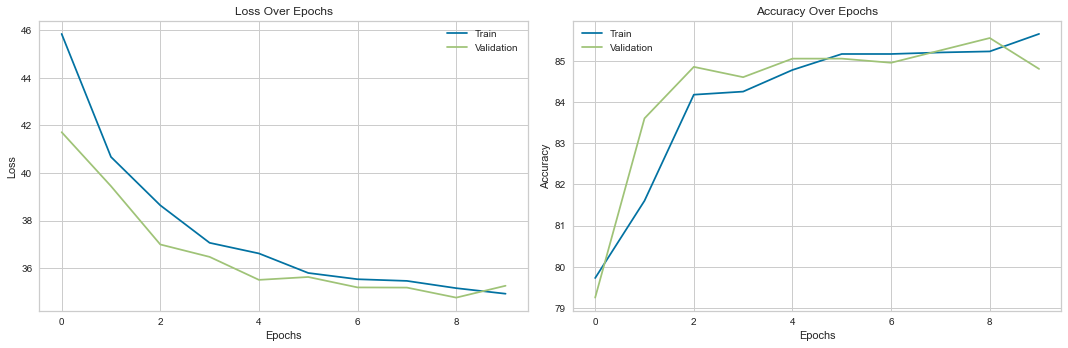

In [682]:
LossAccPlot(history)

#### D6. Model 1: Prediction at 0.5 Threshold
* Predict the Output / Result using 0.5 as a Threshold

In [683]:
# Predict the model at Theshold = 0.5 

y_test_preds = np.where(model1.predict(X_tst) > 0.5, 1, 0)

# Get Class Prediction for Confusion Metrics: 
Y_pred_cls = model1.predict_classes(X_tst, batch_size=200, verbose=0)

# Get Validation Loss: 
val_loss = model1.evaluate( X_tst, y_tst.values)[0]  # model1.metrics_names[0] = 'loss' [1] = 'accuracy'

2000/2000 [==============================] - 0s 35us/sample - loss: 0.3525 - accuracy: 0.8480


In [684]:
# Compile Model Params & Scores in these dfs for comparision with other models: 

model_prm['Model_1'] = ['3 Hidden', 'Adam', 0.001, 30, 10, 'Relu, Sigmoid', 'binary_crossentropy']

model_cmp['Model_1'] = [ accuracy_score(  y_tst, y_test_preds), 
                         recall_score(    y_tst, y_test_preds), 
                         precision_score( y_tst, y_test_preds),
                         f1_score(        y_tst, y_test_preds),
                         val_loss
                       ]

#### D7. Model 1: Performance Evaluation: 
* Print Accuracy Score
* Print Confusion Matrix

In [685]:
# Print Accuracy Score and other Scores: 

print('Model Parameters:')
model_prm.T

print('Model Accuracy & Other Scores:')
model_cmp.T

# Print Confusion Matrix: 

print('Confusion Matrix:')
confusion_matrix(y_tst.values, Y_pred_cls)

Model Parameters:


Layers Optimizer Lrn_Rate Batch_Size Epochs Activation_Function  \
Model_1  3 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   

               Loss_Function  
Model_1  binary_crossentropy

Model Accuracy & Other Scores:


Accuracy   Recall  Precision  F1_Score  Val_Loss
Model_1  0.848000 0.462651   0.703297  0.558140  0.352534

Confusion Matrix:


array([[1504,   81],
       [ 223,  192]])

In [496]:
### Housekeeping: Incremental Jupyter Code File Backup 4 as of now ^^^
Markdown("##### Incremental Jupyter Notebook Code File Backup 4")

! cp "Project 6 NN Bank Churn Prediction.ipynb" \
     "Project 6 NN Bank Churn Prediction 4.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code File Backup 4

-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:37 Project 6 NN Bank Churn Prediction 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:39 Project 6 NN Bank Churn Prediction 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3953142 Sep  3 01:13 Project 6 NN Bank Churn Prediction 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3901988 Sep  3 05:16 Project 6 NN Bank Churn Prediction 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3901988 Sep  3 05:16 Project 6 NN Bank Churn Prediction.ipynb


In [628]:
### Housekeeping: Incremental Jupyter Code File Backup 5 as of now ^^^
Markdown("##### Incremental Jupyter Notebook Code File Backup 5")

! cp "Project 6 NN Bank Churn Prediction.ipynb" \
     "Project 6 NN Bank Churn Prediction 5.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code File Backup 5

-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:37 Project 6 NN Bank Churn Prediction 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:39 Project 6 NN Bank Churn Prediction 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3953142 Sep  3 01:13 Project 6 NN Bank Churn Prediction 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3901988 Sep  3 05:16 Project 6 NN Bank Churn Prediction 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3911300 Sep  3 07:11 Project 6 NN Bank Churn Prediction 5.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3911300 Sep  3 07:11 Project 6 NN Bank Churn Prediction.ipynb


#### D5. Model 2 :  

In [686]:
# Instantiate Neural Network Sequential Model:
model1 = Sequential()

# Add layers & Build NN Model: 

# Input layer:
model1.add(Dense(32, input_dim=15, activation='relu'))

# Hidden layers:
model1.add(Dense(16, activation='relu'))
model1.add(Dense( 5, activation='relu'))
model1.add(Dense( 3, activation='relu'))

# Dropout layer
# model.add(tf.keras.layers.Dropout(0.5))

# Output layer:
model1.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adam(lr = 0.005)

model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

# Execute & Train the Model: 
history = model1.fit(X_trn, y_trn, batch_size=30, epochs=10, verbose=1, validation_data=(X_tst, y_tst))


Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_360 (Dense)            (None, 32)                512       
_________________________________________________________________
dense_361 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_362 (Dense)            (None, 5)                 85        
_________________________________________________________________
dense_363 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_364 (Dense)            (None, 1)                 4         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 168us/samp

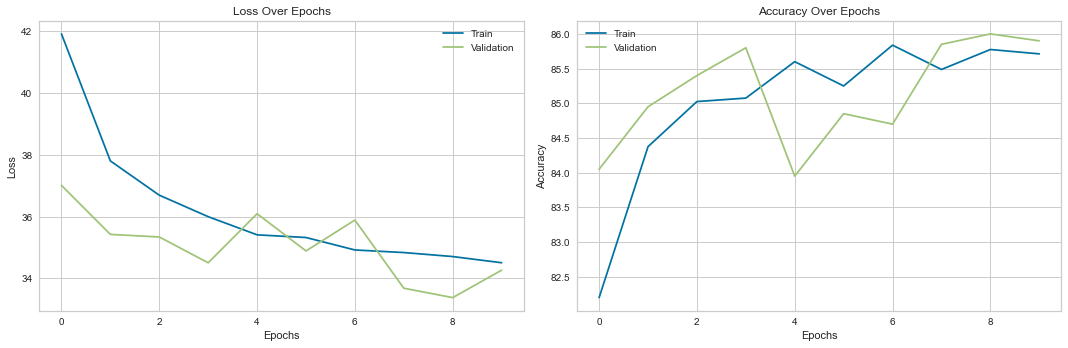

In [687]:
LossAccPlot(history)

#### D6. Model 2: Prediction at 0.5 Threshold
* Predict the Output / Result using 0.5 as a Threshold

In [688]:
# Predict the model at Theshold = 0.5 

y_test_preds = np.where(model1.predict(X_tst) > 0.5, 1, 0)

# Get Class Prediction for Confusion Metrics: 
Y_pred_cls = model1.predict_classes(X_tst, batch_size=200, verbose=0)

# Get Validation Loss: 
val_loss = model1.evaluate( X_tst, y_tst.values)[0]  # model1.metrics_names[0] = 'loss' [1] = 'accuracy'

2000/2000 [==============================] - 0s 37us/sample - loss: 0.3426 - accuracy: 0.8590


In [689]:
# Compile Model Params & Scores in these dfs for comparision with other models: 

model_prm['Model_2'] = ['3 Hidden', 'Adam', 0.005, 30, 10, 'Relu, Sigmoid', 'binary_crossentropy']

model_cmp['Model_2'] = [ accuracy_score(  y_tst, y_test_preds), 
                         recall_score(    y_tst, y_test_preds), 
                         precision_score( y_tst, y_test_preds),
                         f1_score(        y_tst, y_test_preds),
                         val_loss
                       ]

#### D7. Model 2: Performance Evaluation: 
* Print Accuracy Score
* Print Confusion Matrix

In [690]:
# Print Accuracy Score and other Scores: 

print('Model Parameters:')
model_prm.T

print('Model Accuracy & Other Scores:')
model_cmp.T

# Print Confusion Matrix: 

print('Confusion Matrix:')
confusion_matrix(y_tst.values, Y_pred_cls)

Model Parameters:


Layers Optimizer Lrn_Rate Batch_Size Epochs Activation_Function  \
Model_1  3 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   
Model_2  3 Hidden      Adam 0.005000         30     10       Relu, Sigmoid   

               Loss_Function  
Model_1  binary_crossentropy  
Model_2  binary_crossentropy

Model Accuracy & Other Scores:


Accuracy   Recall  Precision  F1_Score  Val_Loss
Model_1  0.848000 0.462651   0.703297  0.558140  0.352534
Model_2  0.859000 0.414458   0.815166  0.549521  0.342630

Confusion Matrix:


array([[1546,   39],
       [ 243,  172]])

In [691]:
### Housekeeping: Incremental Jupyter Code File Backup 6 as of now ^^^
Markdown("##### Incremental Jupyter Notebook Code File Backup 6")

! cp "Project 6 NN Bank Churn Prediction.ipynb" \
     "Project 6 NN Bank Churn Prediction 6.ipynb" 

! ls -l Project*.ipynb

##### Incremental Jupyter Notebook Code File Backup 6

-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:37 Project 6 NN Bank Churn Prediction 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3959622 Sep  3 00:39 Project 6 NN Bank Churn Prediction 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3953142 Sep  3 01:13 Project 6 NN Bank Churn Prediction 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3901988 Sep  3 05:16 Project 6 NN Bank Churn Prediction 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3911300 Sep  3 07:11 Project 6 NN Bank Churn Prediction 5.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3990361 Sep  4 01:23 Project 6 NN Bank Churn Prediction 6.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  3990361 Sep  4 01:23 Project 6 NN Bank Churn Prediction.ipynb


#### D5. Model 3 :  

In [698]:
# Instantiate Neural Network Sequential Model:
model1 = Sequential()

# Add layers & Build NN Model: 

# Input layer:
model1.add(Dense(32, input_dim=15, activation='relu'))

# Hidden layers:
model1.add(Dense(16, activation='relu'))
# model1.add(Dense( 5, activation='relu'))
model1.add(Dense( 3, activation='relu'))

# Dropout layer
# model.add(tf.keras.layers.Dropout(0.5))

# Output layer:
model1.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adam(lr = 0.001)

model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

# Execute & Train the Model: 
history = model1.fit(X_trn, y_trn, batch_size=30, epochs=10, verbose=1, validation_data=(X_tst, y_tst))


Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_381 (Dense)            (None, 32)                512       
_________________________________________________________________
dense_382 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_383 (Dense)            (None, 3)                 51        
_________________________________________________________________
dense_384 (Dense)            (None, 1)                 4         
Total params: 1,095
Trainable params: 1,095
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 116us/sample - loss: 0.6553 - accuracy: 0.8176 - val_loss: 0.6171 - val_accuracy: 0.8355
Epoch 2/10
8000/8000 [==============================]

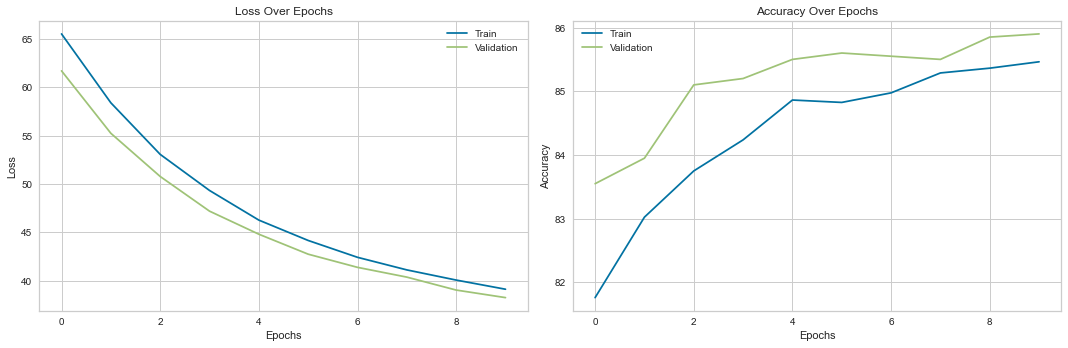

In [699]:
LossAccPlot(history)

#### D6. Model 3: Prediction at 0.5 Threshold
* Predict the Output / Result using 0.5 as a Threshold

In [700]:
# Predict the model at Theshold = 0.5 

y_test_preds = np.where(model1.predict(X_tst) > 0.5, 1, 0)

# Get Class Prediction for Confusion Metrics: 
Y_pred_cls = model1.predict_classes(X_tst, batch_size=200, verbose=0)

# Get Validation Loss: 
val_loss = model1.evaluate( X_tst, y_tst.values)[0]  # model1.metrics_names[0] = 'loss' [1] = 'accuracy'

2000/2000 [==============================] - 0s 33us/sample - loss: 0.3825 - accuracy: 0.8590


In [701]:
# Compile Model Params & Scores in these dfs for comparision with other models: 

model_prm['Model_3'] = ['2 Hidden', 'Adam', 0.001, 30, 10, 'Relu, Sigmoid', 'binary_crossentropy']

model_cmp['Model_3'] = [ accuracy_score(  y_tst, y_test_preds), 
                         recall_score(    y_tst, y_test_preds), 
                         precision_score( y_tst, y_test_preds),
                         f1_score(        y_tst, y_test_preds),
                         val_loss
                       ]

#### D7. Model 3: Performance Evaluation:  
* Print Accuracy Score  
* Print Confusion Matrix  

In [702]:
# Print Accuracy Score and other Scores: 

print('Model Parameters:')
model_prm.T

print('Model Accuracy & Other Scores:')
model_cmp.T

# Print Confusion Matrix: 

print('Confusion Matrix:')
confusion_matrix(y_tst.values, Y_pred_cls)


Model Parameters:


Layers Optimizer Lrn_Rate Batch_Size Epochs Activation_Function  \
Model_1  3 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   
Model_2  3 Hidden      Adam 0.005000         30     10       Relu, Sigmoid   
Model_3  2 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   

               Loss_Function  
Model_1  binary_crossentropy  
Model_2  binary_crossentropy  
Model_3  binary_crossentropy

Model Accuracy & Other Scores:


Accuracy   Recall  Precision  F1_Score  Val_Loss
Model_1  0.848000 0.462651   0.703297  0.558140  0.352534
Model_2  0.859000 0.414458   0.815166  0.549521  0.342630
Model_3  0.859000 0.424096   0.803653  0.555205  0.382521

Confusion Matrix:


array([[1542,   43],
       [ 239,  176]])

#### D5. Model 4 :  

In [703]:
# Instantiate Neural Network Sequential Model:
model1 = Sequential()

# Add layers & Build NN Model: 

# Input layer:
model1.add(Dense(32, input_dim=15, activation='relu'))

# Hidden layers:
model1.add(Dense(16, activation='relu'))
# model1.add(Dense( 5, activation='relu'))
# model1.add(Dense( 3, activation='relu'))

# Dropout layer
# model.add(tf.keras.layers.Dropout(0.5))

# Output layer:
model1.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adam(lr = 0.001)

model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

# Execute & Train the Model: 
history = model1.fit(X_trn, y_trn, batch_size=30, epochs=30, verbose=1, validation_data=(X_tst, y_tst))


Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_385 (Dense)            (None, 32)                512       
_________________________________________________________________
dense_386 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_387 (Dense)            (None, 1)                 17        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 99us/sample - loss: 0.4499 - accuracy: 0.7976 - val_loss: 0.4174 - val_accuracy: 0.8070
Epoch 2/30
8000/8000 [==============================] - 1s 79us/sample - loss: 0.4071 - accuracy: 0.8201 - val_loss: 0.3849 - val_accuracy: 0.8375
Epoch 3/30
8000/8000 [=================

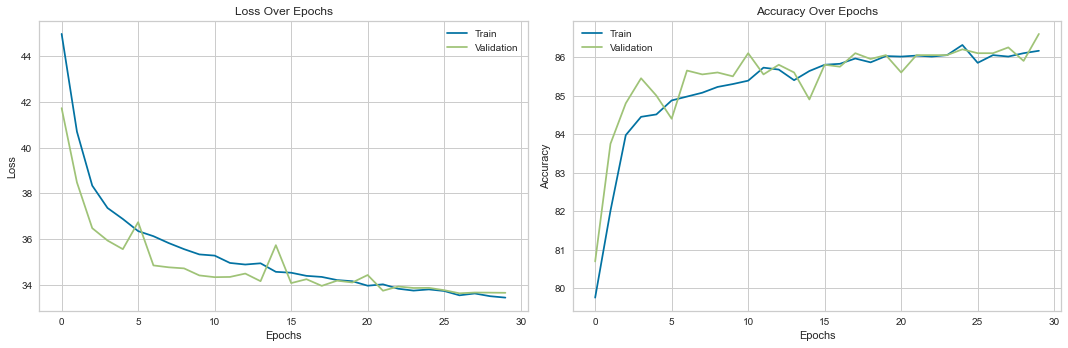

In [704]:
LossAccPlot(history)

#### D6. Model 4: Prediction at 0.5 Threshold
* Predict the Output / Result using 0.5 as a Threshold

In [705]:
# Predict the model at Theshold = 0.5 

y_test_preds = np.where(model1.predict(X_tst) > 0.5, 1, 0)

# Get Class Prediction for Confusion Metrics: 
Y_pred_cls = model1.predict_classes(X_tst, batch_size=200, verbose=0)

# Get Validation Loss: 
val_loss = model1.evaluate( X_tst, y_tst.values)[0]  # model1.metrics_names[0] = 'loss' [1] = 'accuracy'

2000/2000 [==============================] - 0s 33us/sample - loss: 0.3365 - accuracy: 0.8660


In [708]:
# Compile Model Params & Scores in these dfs for comparision with other models: 

model_prm['Model_4'] = ['1 Hidden', 'Adam', 0.001, 30, 30, 'Relu, Sigmoid', 'binary_crossentropy']

model_cmp['Model_4'] = [ accuracy_score(  y_tst, y_test_preds), 
                         recall_score(    y_tst, y_test_preds), 
                         precision_score( y_tst, y_test_preds), 
                         f1_score(        y_tst, y_test_preds), 
                         val_loss 
                       ] 

#### D7. Model 4: Performance Evaluation:  
* Print Accuracy Score  
* Print Confusion Matrix  

In [709]:
# Print Accuracy Score and other Scores: 

print('Model Parameters:')
model_prm.T

print('Model Accuracy & Other Scores:')
model_cmp.T

# Print Confusion Matrix: 

print('Confusion Matrix:')
confusion_matrix(y_tst.values, Y_pred_cls)


Model Parameters:


Layers Optimizer Lrn_Rate Batch_Size Epochs Activation_Function  \
Model_1  3 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   
Model_2  3 Hidden      Adam 0.005000         30     10       Relu, Sigmoid   
Model_3  2 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   
Model_4  1 Hidden      Adam 0.001000         30     30       Relu, Sigmoid   

               Loss_Function  
Model_1  binary_crossentropy  
Model_2  binary_crossentropy  
Model_3  binary_crossentropy  
Model_4  binary_crossentropy

Model Accuracy & Other Scores:


Accuracy   Recall  Precision  F1_Score  Val_Loss
Model_1  0.848000 0.462651   0.703297  0.558140  0.352534
Model_2  0.859000 0.414458   0.815166  0.549521  0.342630
Model_3  0.859000 0.424096   0.803653  0.555205  0.382521
Model_4  0.866000 0.559036   0.731861  0.633880  0.336530

Confusion Matrix:


array([[1500,   85],
       [ 183,  232]])

#### D5. Model 5 :  

In [742]:
# Instantiate Neural Network Sequential Model:
model1 = Sequential()

# Add layers & Build NN Model: 

# Input layer:
model1.add(Dense(32, input_dim=15, activation='relu'))

# Hidden layers:
model1.add(Dense(16, activation='tanh'))
# model1.add(Dense( 5, activation='relu'))
# model1.add(Dense( 3, activation='relu'))

# Dropout layer
# model.add(tf.keras.layers.Dropout(0.5))

# Output layer:
model1.add(Dense(1, activation='sigmoid'))

# opt = optimizers.Adam(lr = 0.001)
opt = optimizers.SGD(learning_rate=0.006)

model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

# Execute & Train the Model: 
history = model1.fit(X_trn, y_trn, batch_size=30, epochs=10, verbose=1, validation_data=(X_tst, y_tst))


Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_430 (Dense)            (None, 32)                512       
_________________________________________________________________
dense_431 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_432 (Dense)            (None, 1)                 17        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 114us/sample - loss: 0.5109 - accuracy: 0.7969 - val_loss: 0.4895 - val_accuracy: 0.7925
Epoch 2/10
8000/8000 [==============================] - 1s 79us/sample - loss: 0.4740 - accuracy: 0.7972 - val_loss: 0.4710 - val_accuracy: 0.7925
Epoch 3/10
8000/8000 [================

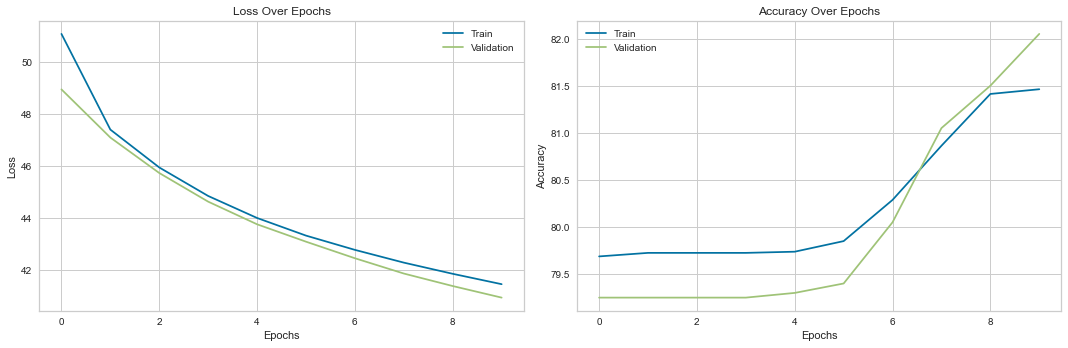

In [743]:
LossAccPlot(history)

#### D6. Model 5: Prediction at 0.5 Threshold
* Predict the Output / Result using 0.5 as a Threshold

In [744]:
# Predict the model at Theshold = 0.5 

y_test_preds = np.where(model1.predict(X_tst) > 0.5, 1, 0)

# Get Class Prediction for Confusion Metrics: 
Y_pred_cls = model1.predict_classes(X_tst, batch_size=200, verbose=0)

# Get Validation Loss: 
val_loss = model1.evaluate( X_tst, y_tst.values)[0]  # model1.metrics_names[0] = 'loss' [1] = 'accuracy'

2000/2000 [==============================] - 0s 37us/sample - loss: 0.4093 - accuracy: 0.8205


In [747]:
# Compile Model Params & Scores in these dfs for comparision with other models: 

model_prm['Model_5'] = ['1 Hidden', 'SGD', 0.006, 30, 10, 'TanH, Sigmoid', 'binary_crossentropy']

model_cmp['Model_5'] = [ accuracy_score(  y_tst, y_test_preds), 
                         recall_score(    y_tst, y_test_preds), 
                         precision_score( y_tst, y_test_preds), 
                         f1_score(        y_tst, y_test_preds), 
                         val_loss 
                       ] 

#### D7. Model 5: Performance Evaluation:  
* Print Accuracy Score  
* Print Confusion Matrix  

In [748]:
# Print Accuracy Score and other Scores: 

print('Model Parameters:')
model_prm.T

print('Model Accuracy & Other Scores:')
model_cmp.T

# Print Confusion Matrix: 

print('Confusion Matrix:')
confusion_matrix(y_tst.values, Y_pred_cls)


Model Parameters:


Layers Optimizer Lrn_Rate Batch_Size Epochs Activation_Function  \
Model_1  3 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   
Model_2  3 Hidden      Adam 0.005000         30     10       Relu, Sigmoid   
Model_3  2 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   
Model_4  1 Hidden      Adam 0.001000         30     30       Relu, Sigmoid   
Model_5  1 Hidden       SGD 0.006000         30     10       TanH, Sigmoid   

               Loss_Function  
Model_1  binary_crossentropy  
Model_2  binary_crossentropy  
Model_3  binary_crossentropy  
Model_4  binary_crossentropy  
Model_5  binary_crossentropy

Model Accuracy & Other Scores:


Accuracy   Recall  Precision  F1_Score  Val_Loss
Model_1  0.848000 0.462651   0.703297  0.558140  0.352534
Model_2  0.859000 0.414458   0.815166  0.549521  0.342630
Model_3  0.859000 0.424096   0.803653  0.555205  0.382521
Model_4  0.866000 0.559036   0.731861  0.633880  0.336530
Model_5  0.820500 0.212048   0.733333  0.328972  0.409271

Confusion Matrix:


array([[1553,   32],
       [ 327,   88]])

#### D5. Model 6 :  

In [824]:
# Instantiate Neural Network Sequential Model:
model1 = Sequential()

# Add layers & Build NN Model: 

# Input layer:
model1.add(Dense(32, input_dim=15, activation='relu'))

# Hidden layers:
model1.add(Dense(16, activation='relu'))
model1.add(Dense( 5, activation='relu'))
model1.add(Dense( 3, activation='relu'))

# Dropout layer
# model.add(tf.keras.layers.Dropout(0.5))

# Output layer:
model1.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adam(lr = 0.003)
# opt = optimizers.SGD(learning_rate=0.006)

model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

# Execute & Train the Model: 
history = model1.fit(X_trn, y_trn, batch_size=60, epochs=10, verbose=1, validation_data=(X_tst, y_tst))


Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_538 (Dense)            (None, 32)                512       
_________________________________________________________________
dense_539 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_540 (Dense)            (None, 5)                 85        
_________________________________________________________________
dense_541 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_542 (Dense)            (None, 1)                 4         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 140us/sam

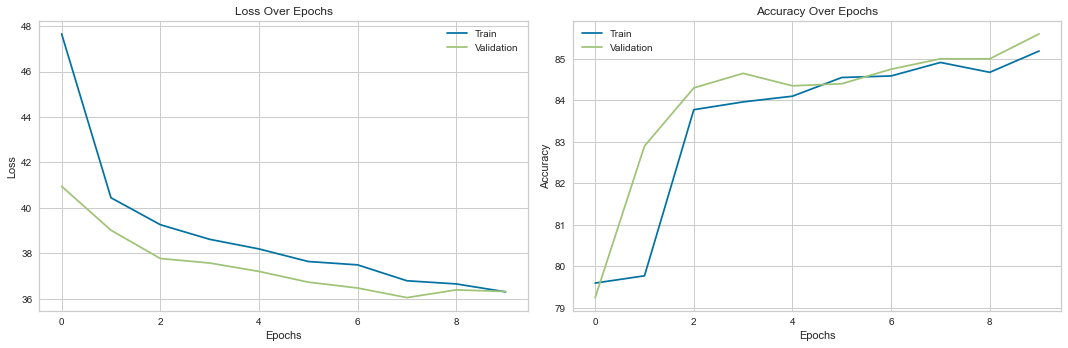

In [825]:
LossAccPlot(history)

#### D6. Model 6: Prediction at 0.5 Threshold
* Predict the Output / Result using 0.5 as a Threshold

In [826]:
# Predict the model at Theshold = 0.5 

y_test_preds = np.where(model1.predict(X_tst) > 0.5, 1, 0)

# Get Class Prediction for Confusion Metrics: 
Y_pred_cls = model1.predict_classes(X_tst, batch_size=200, verbose=0)

# Get Validation Loss: 
val_loss = model1.evaluate( X_tst, y_tst.values)[0]  # model1.metrics_names[0] = 'loss' [1] = 'accuracy'

2000/2000 [==============================] - 0s 43us/sample - loss: 0.3631 - accuracy: 0.8560


In [827]:
# Compile Model Params & Scores in these dfs for comparision with other models: 

model_prm['Model_6'] = ['3 Hidden', 'Adam', 0.003, 60, 10, 'Relu, Sigmoid', 'binary_crossentropy']

model_cmp['Model_6'] = [ accuracy_score(  y_tst, y_test_preds), 
                         recall_score(    y_tst, y_test_preds), 
                         precision_score( y_tst, y_test_preds), 
                         f1_score(        y_tst, y_test_preds), 
                         val_loss 
                       ] 

#### D7. Model 6: Performance Evaluation:  
* Print Accuracy Score  
* Print Confusion Matrix  

In [828]:
# Print Accuracy Score and other Scores: 

print('Model Parameters:')
model_prm.T

print('Model Accuracy & Other Scores:')
model_cmp.T

# Print Confusion Matrix: 

print('Confusion Matrix:')
confusion_matrix(y_tst.values, Y_pred_cls)


Model Parameters:


Layers Optimizer Lrn_Rate Batch_Size Epochs Activation_Function  \
Model_1  3 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   
Model_2  3 Hidden      Adam 0.005000         30     10       Relu, Sigmoid   
Model_3  2 Hidden      Adam 0.001000         30     10       Relu, Sigmoid   
Model_4  1 Hidden      Adam 0.001000         30     30       Relu, Sigmoid   
Model_5  1 Hidden       SGD 0.006000         30     10       TanH, Sigmoid   
Model_6  3 Hidden      Adam 0.003000         60     10       Relu, Sigmoid   

               Loss_Function  
Model_1  binary_crossentropy  
Model_2  binary_crossentropy  
Model_3  binary_crossentropy  
Model_4  binary_crossentropy  
Model_5  binary_crossentropy  
Model_6  binary_crossentropy

Model Accuracy & Other Scores:


Accuracy   Recall  Precision  F1_Score  Val_Loss
Model_1  0.848000 0.462651   0.703297  0.558140  0.352534
Model_2  0.859000 0.414458   0.815166  0.549521  0.342630
Model_3  0.859000 0.424096   0.803653  0.555205  0.382521
Model_4  0.866000 0.559036   0.731861  0.633880  0.336530
Model_5  0.820500 0.212048   0.733333  0.328972  0.409271
Model_6  0.856000 0.356627   0.875740  0.506849  0.363103

Confusion Matrix:


array([[1564,   21],
       [ 267,  148]])

In [920]:
# Save Model Param & Score dfs to disk: 

model_prm.to_csv('model_prm.csv') 
model_cmp.to_csv('model_cmp.csv') 

# Verify saved copies:
! ls -l model*


-rw-r--r--@ 1 RiddhiSiddhi  staff  590 Sep  4 06:57 model_cmp.csv
-rw-r--r--@ 1 RiddhiSiddhi  staff  498 Sep  4 06:57 model_prm.csv


### <u>✓ Final Conclusion : Models Parameters & Accuracy Scores</u>: ⬇  
From the Stats df above & from the actual "model.fit" previous runs for indiviual Models above :  

**<u>Model 4 Has The Best Scores For</u>:** 
* Accuracy = 0.866 (Highest in Train);  Validation Accuracy = 0.8660  ( <u>RIGHT FIT</u> ! Train & Test is Same! No Under or Over Fit ! )
* Recall   = 0.559 (Highest)
* F1_Score = 0.634 (Highest)
* Val_Loss = 0.336 (Lowest);  Train Loss = loss: 0.334  ( Almost Same ! )  


In [921]:
# Highlight and Re Display Stats for ONLY the Specific Best Model from the model_prm & model_cmp dfs: 

Markdown('* **Best Model 4 Parameters:**')  
model_prm.iloc[:, 3:4].T

Markdown('* **Best Model 4 Accuracy Score & Stats:**')  
model_cmp.iloc[:, 3:4].T


* **Best Model 4 Parameters:**

Layers Optimizer Lrn_Rate Batch_Size Epochs Activation_Function  \
Model_4  1 Hidden      Adam 0.001000         30     30       Relu, Sigmoid   

               Loss_Function  
Model_4  binary_crossentropy

* **Best Model 4 Accuracy Score & Stats:**

Accuracy   Recall  Precision  F1_Score  Val_Loss
Model_4  0.866000 0.559036   0.731861  0.633880  0.336530

**<u>Best Model 4 Confusion Matrix</u>:** From the Model 4 "model.fit" Run:

Accuracy: 86.6 % of Test Data was Classified Correctly!


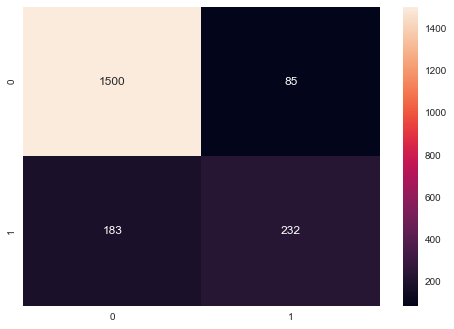

In [922]:
Markdown('**<u>Best Model 4 Confusion Matrix</u>:** From the Model 4 "model.fit" Run:')

# Copy & Paste from the previous Output Cell # 709 above for model_4 run: 
# array([[1500,   85],
#       [ 183,  232]])

# Recreate Confusion Matrix data df from previous model_4 output cell # 709: 
cm = pd.DataFrame( [ [1500, 85], [183, 232] ] )

g = sns.heatmap(cm, annot=True, fmt='d')

print('Accuracy:', ((cm[0][0]+cm[1][1])*100)/(len(y_tst)), '% of Test Data was Classified Correctly!')


### ⬆ Code End : Project 6 NN Bank Chrun Prediction : End of File ⬆